In [105]:
import numpy as np
import matplotlib.pyplot as plt
from pygmid import Lookup 

#### Technology data

In [106]:
nch= Lookup(r"C:\Users\zinou\Documents\repos\Chipathon2024\techsweep\simulation\nfet_01v8_lvt.mat")

#### Specifications

In [107]:
gm=5.2e-3

#### Design choices

In [108]:
l=[0.15,0.18,0.2,0.22,0.25]
gm_id_values = np.linspace(6, 22, 100)  # Adjust range as needed
plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

#### Sizing and Benchmarking

In [109]:
gm_gds = nch.lookup("GM_GDS", GM_ID=gm_id_values, L=l)  # Replace 'GM_GDS' with the correct key)

#### gm/gds

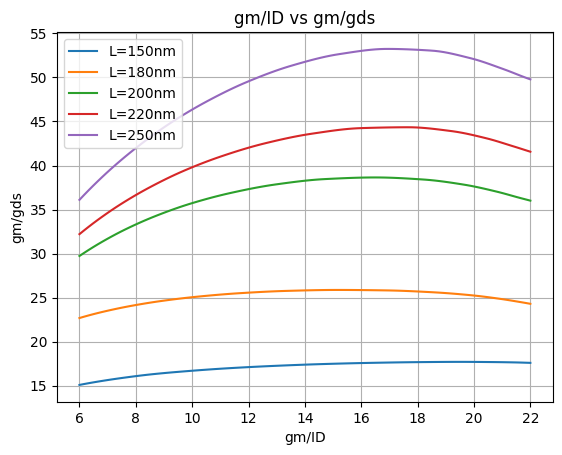

In [110]:
gm_gds_list=[]
for l_val in l:
    gm_gds = nch.lookup("GM_GDS", GM_ID=gm_id_values, L=l_val)  # Lookup gm/gds for this L
    gm_gds_list.append(gm_gds)
    plt.plot(gm_id_values, gm_gds, label=f"L={l_val*1e3:.0f}nm")  # Convert L to nm for label
#plt.figure()
#plt.plot(gm_id_values, gm_gds, label="")
plt.xlabel("gm/ID")
plt.ylabel("gm/gds")
plt.title("gm/ID vs gm/gds")
plt.legend()
plt.grid()
plt.show()

In [111]:
for l_val, gm_gds in zip(l, gm_gds_list):  # Assume gm_gds_list contains gm/gds arrays for each L
    gm_gds_target = gm_gds[np.argmin(np.abs(gm_id_values - 20))]
    print(f"gm/gds for gm/ID = {20}, L={l_val*1e3:.0f} nm: {gm_gds_target}")

gm/gds for gm/ID = 20, L=150 nm: 17.70076131258732
gm/gds for gm/ID = 20, L=180 nm: 25.219132907066466
gm/gds for gm/ID = 20, L=200 nm: 37.58233294872271
gm/gds for gm/ID = 20, L=220 nm: 43.38428386822728
gm/gds for gm/ID = 20, L=250 nm: 52.02623453417925


#### VGS

vgs for gm/ID=20,L=150 nm: 0.5886267896499466
vgs for gm/ID=20,L=180 nm: 0.5968921536124382
vgs for gm/ID=20,L=200 nm: 0.5918790394848319
vgs for gm/ID=20,L=220 nm: 0.5832117055829201
vgs for gm/ID=20,L=250 nm: 0.5715031628387398


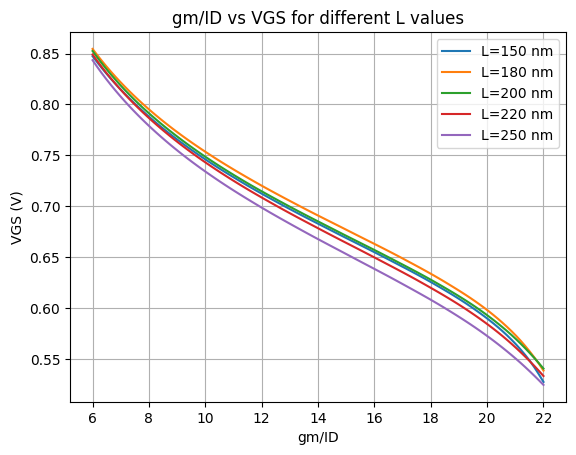

In [112]:
#vgs = nch.lookup("VGS", GM_ID=gm_id_values, L=l)  # Replace 'GM_GDS' with the correct key)
for l_val in l:  # Iterate over scalar L values
    vgs_values = []  # To store VGS values for this L
    for gm_id in gm_id_values:
        # Perform lookup for each gm/ID and scalar L
        vgs_value = nch.look_upVGS(GM_ID=gm_id, VDS=0.9, VSB=0.0, L=l_val)  # Adjust as needed
        vgs_values.append(vgs_value)
    vgs_target=vgs_values[np.argmin(np.abs(gm_id_values-20))]
    print(f"vgs for gm/ID={20},L={l_val*1e3:.0f} nm: {vgs_target}")
    # Convert to NumPy array for plotting
    vgs_values = np.array(vgs_values)
    plt.plot(gm_id_values, vgs_values, label=f"L={l_val * 1e3:.0f} nm")  # Convert L to nm for label
plt.xlabel("gm/ID")
plt.ylabel("VGS (V)")
plt.title("gm/ID vs VGS for different L values")
plt.legend()  # Explicitly display the legend
plt.grid(True)  # Turn on the grid
plt.show()



#### W

W for gm/ID=20, L=150 nm: 86.449 um
W for gm/ID=20, L=180 nm: 98.355 um
W for gm/ID=20, L=200 nm: 107.968 um
W for gm/ID=20, L=220 nm: 122.903 um
W for gm/ID=20, L=250 nm: 144.729 um


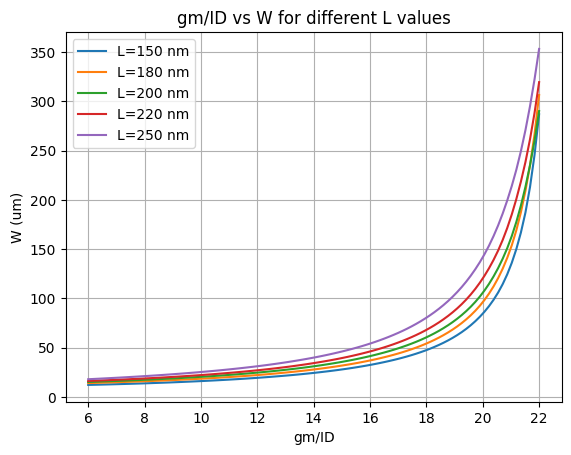

In [113]:
plt.figure()

# Loop through each L value
for l_val in l:  # Iterate over scalar L values
    w_values = []  # To store W values for this L
    for gm_id in gm_id_values:
        # Perform lookup for each gm/ID and scalar L
        jd = nch.lookup("ID_W", GM_ID=gm_id, L=l_val)  # Lookup JD for the given gm/ID and L
        id = gm / gm_id  # Calculate ID for the current gm/ID
        w = id / jd  # Calculate W = ID / JD
        w_values.append(w)  # Store W for this gm/ID

    # Find W for target gm/ID = 20
    w_target = w_values[np.argmin(np.abs(gm_id_values - 20))]
    print(f"W for gm/ID={20}, L={l_val*1e3:.0f} nm: {w_target:.3f} um")

    # Convert W values to NumPy array for plotting
    w_values = np.array(w_values)
    plt.plot(gm_id_values, w_values, label=f"L={l_val * 1e3:.0f} nm")  # Convert L to nm for label

# Add labels, title, legend, and grid
plt.xlabel("gm/ID")
plt.ylabel("W (um)")
plt.title("gm/ID vs W for different L values")
plt.legend()  # Explicitly display the legend
plt.grid(True)  # Turn on the grid
plt.show()
